# Lab 02. Feature selection and GridSearch


In this lab we will tackle two types of tasks: feature selection and hyperparameter tuning.

Lectures and seminars you might find useful:
- Lectures 1 - 4
- Seminars 2 and 3


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab02_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab02_404_Sheipak_Sviat.ipynb`
    - `2022_lab02_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab02_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-10-20 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/vHEio0TmfAMmZg

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1. Feature Selection [4 points]

In this part of the assignemt you will be offered a task to analyze a dataset and figure out which features are the most important. The first means to solve this problem is to use linear model and examine the weights, another option is to train a logic classifier and see which featires it uses to build the splits. And finally you may use PCA and analyze how new PCA-features are configured.

Firstly, load the data from `feature_selection_sample.txt` and save it into variable `db`.

In [23]:
input_filename = 'feature_selection_sample.txt'
db = pd.read_csv(input_filename, sep='\t', header=None)
#print(db)

           0          1         2         3          4         5         6   \
0    1.550508  19.483747 -0.002987  4.421460   5.541652  0.468138 -0.017365   
1    9.683788  14.336396 -0.027154  5.100489   8.179487  0.573692 -0.024525   
2    4.682631   8.112067 -0.012813  4.680838   1.514920  0.974407 -0.009002   
3    7.768197   2.074808 -0.014950  7.977821  13.602144  0.599069 -0.018800   
4    4.078857   8.307135 -0.004062  9.351602   6.661857  0.193607 -0.019705   
..        ...        ...       ...       ...        ...       ...       ...   
995  1.628431   8.719807 -0.005997  6.655049  13.718759  0.630336 -0.011546   
996  9.071794  14.742854 -0.033237  7.995329   3.219032  0.800022 -0.015135   
997  5.058303   3.274936 -0.005873  6.672859   8.600655  0.585563 -0.028025   
998  2.963628  14.404009 -0.017381  7.552177   9.202069  0.940339 -0.009882   
999  1.812830  19.322770 -0.020107  9.858035   4.280952  0.963976 -0.008499   

           7         8         9   10  
0    0.0054

Feature columns are `[0-9]` and the target is `[10]`. Split the table into object and target arrays:

In [22]:
X = db.drop([10], axis=1)
Y = db.drop([0,1,2,3,4,5,6,7,8,9], axis=1)
#print(X,Y)

            0          1         2         3          4         5         6  \
0    1.550508  19.483747 -0.002987  4.421460   5.541652  0.468138 -0.017365   
1    9.683788  14.336396 -0.027154  5.100489   8.179487  0.573692 -0.024525   
2    4.682631   8.112067 -0.012813  4.680838   1.514920  0.974407 -0.009002   
3    7.768197   2.074808 -0.014950  7.977821  13.602144  0.599069 -0.018800   
4    4.078857   8.307135 -0.004062  9.351602   6.661857  0.193607 -0.019705   
..        ...        ...       ...       ...        ...       ...       ...   
995  1.628431   8.719807 -0.005997  6.655049  13.718759  0.630336 -0.011546   
996  9.071794  14.742854 -0.033237  7.995329   3.219032  0.800022 -0.015135   
997  5.058303   3.274936 -0.005873  6.672859   8.600655  0.585563 -0.028025   
998  2.963628  14.404009 -0.017381  7.552177   9.202069  0.940339 -0.009882   
999  1.812830  19.322770 -0.020107  9.858035   4.280952  0.963976 -0.008499   

            7         8         9  
0    0.005496  

Now split the data into train and test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
RANDOM_SEED = 42

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

In [ ]:
#print(X_train,X_test, Y_train, Y_test)

**Task 1.1 [1 point] Linear models**

Import `LinearRegression` and define a problem with default parameters.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model_lr = LinearRegression()

Train the model and check the quality both on train set and test set. Since we are solving a regression problem, we will use `mean_squared_error` as a quality metric.

In [17]:
from sklearn.metrics import mean_squared_error

In [19]:
model_lr.fit(X_train, Y_train)
#print(model_lr.score(X_train, Y_train))
#print(model_lr.intercept_)
#print(model_lr.coef_)
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)

train_score = mean_squared_error(Y_train, train_pred)
test_score = mean_squared_error(Y_test, test_pred)
print("Linear Regression scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))
original_test_score = test_score
#print(9, test_pred)

Linear Regression scores: train: 5.814, test: 6.916


Extract feature-vector from the trained model (see [this page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)) and bar-plot them.

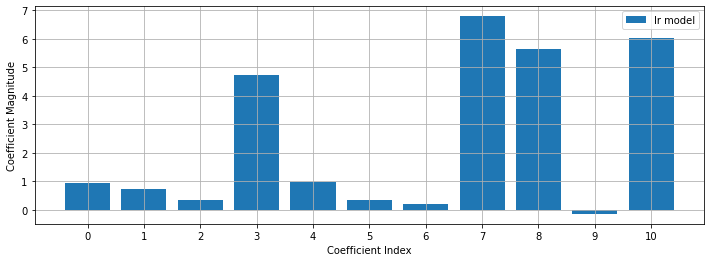

In [24]:
model_coefs =  np.append(model_lr.intercept_,model_lr.coef_[0])
#print(model_lr.intercept_)
#print(model_lr.coef_)
#print(model_lr.coef_[0])
ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar([0,1,2,3,4,5,6,7,8,9,10], model_coefs,label='lr model')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

According to this plot, what are the most important features?

**Your answer here**: 3,7,8,10

Save 4 most important feature indexes to a list:

In [25]:
important_feature_idx = [2,6,7,9]

Use these feature indexes to construct new train and test sets with smaller amount of features:

In [26]:
X_train_smaller = X_train[list(important_feature_idx)]
X_test_smaller = X_test[list(important_feature_idx)]

Define a new `LinearRegression` model, train and test it on new sets: 

In [28]:
smaller_model = LinearRegression()
smaller_model.fit(X_train_smaller, Y_train)
train_pred =  smaller_model.predict(X_train_smaller)
test_pred = smaller_model.predict(X_test_smaller)
train_score = mean_squared_error(Y_train, train_pred)
test_score = mean_squared_error(Y_test, test_pred)
print("{} train score: {:.3f}, test score: {:3.3f}".format('Smaller LR', train_score, test_score))

Smaller LR train score: 22.244, test score: 26.171


Compare scores of `model_lr` (variable `original_score`) and `smaller_model` (variable `smaller_test_score`). We reduced number of feature but why scores changes so drastically?

**Your answer here**: коэффиценты в линейном уравнении обозначают не значимость признака, а корректируют его масштаб. Поэтому они не обозначают, какие признаки сильно влияют на Х, а какие почти не влияют. Мы убрали какие-то важные признаки, соответственно модель не сможет давать правильные предсказания за недостатком информации.

**Task 1.2 [1 point] Linear models on scaled data**

It is time to fix this failure and scale the data - we should have done it earlier, since we decided to use linear models. Import the scaler and apply it to all of the data (`X`)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
st_scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(st_scaler.transform(X))

Now we repeat all the steps:
- split the data
- train a model on all features
- plot coefficients
- choose 4 most-important features
- train a model on a feature-subset
- compare the scores
- profit!

In [31]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=RANDOM_SEED)

In [34]:
model_lr_sc = LinearRegression()
model_lr_sc.fit(X_sc_train, Y_sc_train)
train_pred = model_lr_sc.predict(X_sc_train)
test_pred =  model_lr_sc.predict(X_sc_test)
train_score = mean_squared_error(train_pred, Y_sc_train)
test_score =  mean_squared_error(test_pred, Y_sc_test)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.814, test: 6.916


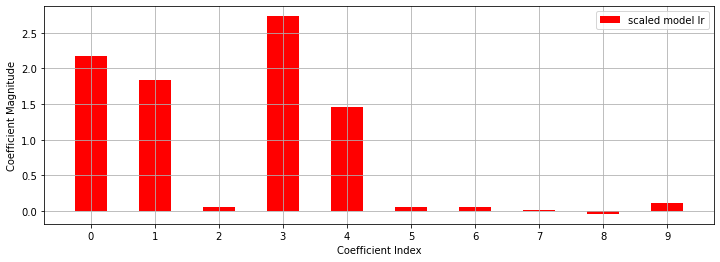

In [39]:
model_coefs =  model_lr_sc.coef_[0]
#print(model_coefs)
ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs, label='scaled model lr', width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

What are the most important features now? Let's do the sanity check and train on this subset:

In [37]:
important_feature_idx = [0,1,3,4] 


In [38]:
X_sc_train_smaller = X_sc_train[list(important_feature_idx)]
X_sc_test_smaller = X_sc_test[list(important_feature_idx)]
#print(X_sc_train)
#print(X_sc_test)
#print(X_sc_train_smaller)
#print(X_sc_train_smaller)

In [40]:
model_lr_sc_smaller = LinearRegression()
model_lr_sc_smaller.fit(X_sc_train_smaller, Y_sc_train)
train_pred =  model_lr_sc_smaller.predict(X_sc_train_smaller)
test_pred = model_lr_sc_smaller.predict(X_sc_test_smaller)
train_score = mean_squared_error(train_pred, Y_sc_train)
test_score =  mean_squared_error(test_pred, Y_sc_test)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.841, test: 6.856


Has **MSE** changed? To what extent?

**Your answer here**: поменялся совсем немного, практически незаметно, ухудшился на 0.03 на обучающей выборке и улучшился на 0.06 на тестовой выборке. Это полпроцента.

**Task 2 [2 points] Decision Tree**

As you probably now, there are models that are not influence by the fact that data is not normalized: for example, Decision Tree or Random Forest.

Since you already have all the sets prepared: `X_train` and `X_sc_train`, train a RF model and prove that scaling does not affect feature importances.

Then compare durations of training loops for a set with 10 features and 4 features.

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor()
rf_scaled = RandomForestRegressor()

In [43]:
rf.fit(X_train, Y_train)
rf_scaled.fit(X_sc_train, Y_sc_train)
rf_test_score = rf.score(X_test, Y_test)
rf_scaled_test_score = rf_scaled.score(X_sc_test, Y_sc_test)
print("RF test score {:.3f}".format(rf_test_score))
print("RF scaled test score {:.3f}".format(rf_scaled_test_score))

<ipython-input-43-02e85e1becb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)
<ipython-input-43-02e85e1becb7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_scaled.fit(X_sc_train, Y_sc_train)


RF test score 0.881
RF scaled test score 0.885


Look up an attribute for feature importances [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

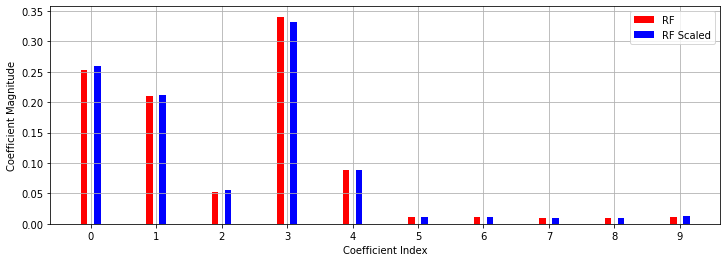

In [44]:
rf_model_coefs =rf.feature_importances_
rf_scaled_model_coefs = rf_scaled.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
plt.bar(default_x + 0.1, rf_scaled_model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Your Comment on the plot:** Решающие деревья определили важность признаков примерно так же, как и линейная модель (самыми важными оказались те же признаки). Есть небольшие отличия между отмасштабированными и изначальными данными, но они незначительны. 

Now examine how reduction of number of features impacts durations of training loops. You may use `time` module.

Here is an example of `time` usage:

In [45]:
from time import time

n = 1000
a = np.diag(np.ones(n)) + np.random.rand(n, n)

start = time()
det = np.linalg.det(a)
end = time()
print("{} x {} matrix determinant took {:.3f} seconds".format(n, n, end - start))

1000 x 1000 matrix determinant took 0.046 seconds


/usr/local/lib/python3.8/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [46]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [49]:
start1=time()
rf1 = RandomForestRegressor()
rf1.fit(X_sc_train, Y_sc_train)
end1=time()
print("it took {:.3f} seconds for 10 features".format (end1 - start1))

start2=time()
rf1 = RandomForestRegressor()
rf1.fit(X_sc_train_smaller, Y_sc_train)
end2=time()
print("it took {:.3f} seconds for 4 features ".format (end2 - start2))

#print(X_sc_train, X_sc_train_smaller)

<ipython-input-49-979fca566a94>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_sc_train, Y_sc_train)


it took 0.484 seconds for 10 features


<ipython-input-49-979fca566a94>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_sc_train_smaller, Y_sc_train)


it took 0.272 seconds for 4 features 


**Your Comment on time consuption**: с меньшим количеством фичей алгоритму стало полегче, время сократилось примерно в два раза

## Part 2. GridSearch: hyperparameter tuning  [11 points]

In this part we will try to solve a multiclass classification task on Richter's dataset ([source](https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage)). The aim is to predict damage rate (label from 1 to 3).

We will experiment with following models:
- kNN
- LinearRegression
- DecisionTree
- RandomForest

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data, transform the table into arrays `X` and `y`, target column is called *damage_grade*. Note that objects are described with both numerical and categorical features. In the first part of this assignment we will use numerical features only (apply `_get_numeric_data()` to `pandas` dataframe).

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1. Since we are going to use metric classifiers, don't forget to preprocess the data.

In [10]:
RANDOM_SEED = 42

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [17]:
data = pd.read_csv("richters_sample.csv")
objects = data.drop(columns="damage_grade")
labels = data["damage_grade"]

#print(data)

In [18]:
X = objects._get_numeric_data()
y = labels
assert X.shape == (35000, 31) and  y.shape == (35000,)

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size=15000, 
                                                    shuffle=True, stratify= None,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size=5000, 
                                                    shuffle=True, stratify= None,
                                                    random_state=RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

Import the models:

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Import classification quality metrics:

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Task 2.1 [2 points]. Default-parameter models**

Let's take 4 classifiers (1 of a kind) with **default** parameters and check how well they can perform.

In [7]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on `X_train, y_train`, predict on `X_test`

In [59]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train,y_train)  
    pred = clf.predict(X_test)
    clf_predictions.append(pred)


Apply 5 metrics to each prediction:

In [213]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls =[recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions]
macro_precisions =[precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions] 
macro_recalls = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

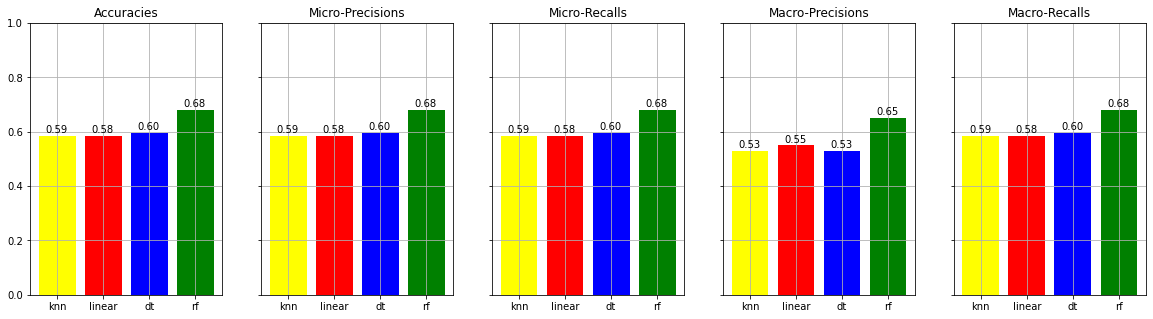

In [214]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Choose the model with the biggest gap between micro-precision and macro-precision and plot its confusion matrix.
For confusion matrix do `from sklearn.metrics import confusion_matrix` (don't forget to put valid labels on plots).

In [215]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [216]:
weakest_model_index = 2 #YOUR CODE HERE: 0,1,2 or 3?

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, clf3.predict(X_test))

[1, 2, 3]


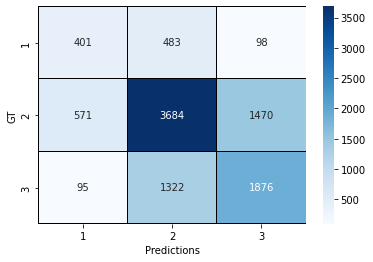

In [217]:
plot_labels = sorted(labels.unique())
print(plot_labels)
sns.heatmap( conf_matrix, 
            cmap="Blues",
            xticklabels=plot_labels,
            yticklabels=plot_labels,
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

Going by confusion matrix, which class is the hardest to predict? How does it affect macro/micro-precision?

**Your answer:** хуже всего модель определяет damage_grade = 1 (меньше половины правильных ответов). В микро-пресижине доля FP суммарно в знаменателе получается не очень большая в сравнении с числителем, но в макро-пресижине у первого члена суммы знаменатель получается гигантский, соответственно первый член получается очень маленький, отсюда вся сумма получается меньше. Итак, на макро-пресижн неудачная классификация damage_grade=1 заметно влияет, и он получается меньше микро-пресижна

**Task 2.2 [3 points]. 1-D Grid Search**

No wonder that default models have scores far from perfect. Let's tweak those hyperparameters with GridSearch: we will iteratively look through all combinations of parameters in the grid and choose the best. At each iteraction use cross validation score with number of folds `k=5`.

Firstly, build the grid for kNN. It will be a 1-D grid with the only parameter `n_neighbors`. Look through all values from 1 to 50.

*Hint*: `np.arange`, `np.linspace` and `np.logspace` are very useful for grid constructions.

**Attention** this part of assignment may need a lot of computational powers (as you probably remember, training of knn is quite expensive). 

To save some resources while doing grid search for knn you may use the trick from Part1: do feature-selection with DTree/RandomForest and select top-5 or top-10 features.

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [49]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1,51)
}
#print(knn_grid)

In [220]:
knn_grid_searcher = GridSearchCV(knn_clf,knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [221]:
#display(knn_grid_searcher.cv_results_)

Plot mean cross-validation score for each hyperparameter:
- X-axis is hyperparameter values
- Y-axis is mean CV-score

To show variance of obtained estimatets add *mean + 3 stds* and *mean - 3 stds* to the plot. You may use `plt.fill_between` to make it more descriptive (it will look like a coridor around the mean).

To get values we need to plot search in `knn_grid_searcher` parameters and attributes.

In [222]:
means = knn_grid_searcher.cv_results_['mean_test_score']
stds = knn_grid_searcher.cv_results_['std_test_score']
print(stds)

[0.00245764 0.00542218 0.00452051 0.00678233 0.00744077 0.00430871
 0.00559017 0.00619597 0.00493812 0.00834116 0.00643506 0.00554752
 0.00514927 0.00801155 0.00539444 0.00546443 0.00454423 0.00565995
 0.00379803 0.0062462  0.00359653 0.00524786 0.00428252 0.00408534
 0.00315991 0.0044017  0.00537122 0.00678344 0.00459728 0.00453211
 0.00440908 0.00481248 0.00442832 0.00502892 0.00420892 0.0045183
 0.00651613 0.00771589 0.00794607 0.00596112 0.00644864 0.00708943
 0.0066     0.0066888  0.00669253 0.00756736 0.00853874 0.00879773
 0.00901887 0.00716484]


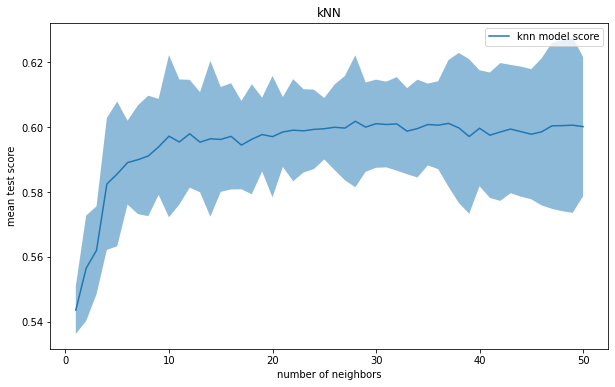

In [223]:
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means,label='knn model score')
plt.fill_between(xs, means-3*stds, means+3*stds, alpha=.5, linewidth=0)
plt.legend()
plt.title('kNN')
plt.xlabel('number of neighbors')
plt.ylabel('mean test score')
plt.show()

Print the best estimator and its score:

In [230]:
print('best estimator: ',knn_grid_searcher.best_params_)

print('its score: ', knn_grid_searcher.best_score_)

best estimator:  {'n_neighbors': 28}
its score:  0.60185


Now do the same for 3 other models:
- Decision Tree: grid search the `max_depth` parameter
- LogisticRegression: `penalty`
- RandomForest: `n_estimators`

Some of the hyperparameters are not numeric, but categorical (like `penalty`) and you should choose some other way to plot cv-scores instead of `plt.plot`

**Decision Tree**

In [231]:
dt_clf = DecisionTreeClassifier()
dt_grid = {
    "max_depth":  np.arange(1,51)
}
#print(dt_grid)
dt_grid_searcher = GridSearchCV(dt_clf, dt_grid , cv=5, return_train_score=True)
dt_grid_searcher.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

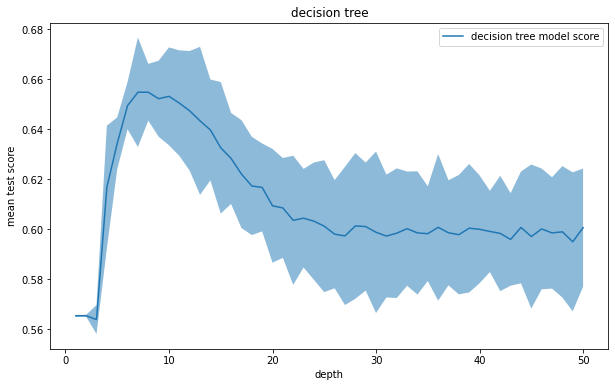

best estimator:  {'max_depth': 8}
its score:  0.6548


In [232]:
means = dt_grid_searcher.cv_results_['mean_test_score']
stds = dt_grid_searcher.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
xs = dt_grid_searcher.param_grid["max_depth"]
plt.plot(xs, means,label='decision tree model score')
plt.fill_between(xs, means-3*stds, means+3*stds, alpha=.5, linewidth=0)
plt.legend()
plt.title('decision tree')
plt.xlabel('depth')
plt.ylabel('mean test score')
plt.show()
print('best estimator: ',dt_grid_searcher.best_params_)
print('its score: ', dt_grid_searcher.best_score_)

**LogisticRegression**

In [233]:
lr_clf = LogisticRegression(solver='saga', l1_ratio=0.5)
lr_grid = {
    "penalty": ('l1', 'l2', 'elasticnet', 'none')
}
lr_grid_searcher = GridSearchCV(lr_clf, lr_grid , cv=5, return_train_score=True)
lr_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(l1_ratio=0.5, solver='saga'),
             param_grid={'penalty': ('l1', 'l2', 'elasticnet', 'none')},
             return_train_score=True)

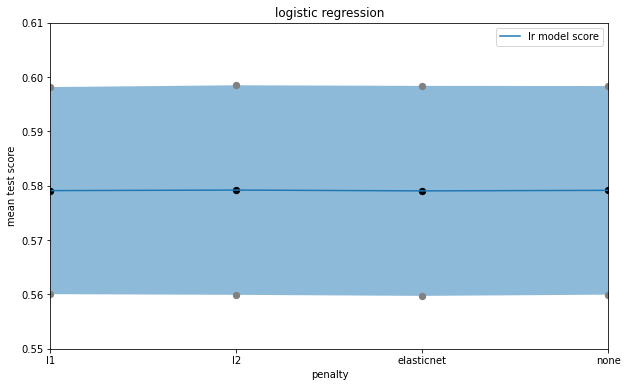

best estimator:  {'penalty': 'l2'}
its score: 0.5792


In [234]:
means = lr_grid_searcher.cv_results_['mean_test_score']
stds = lr_grid_searcher.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
xs = lr_grid_searcher.param_grid["penalty"]
plt.plot(xs, means,label='lr model score')
plt.fill_between(xs, means-3*stds, means+3*stds, alpha=.5, linewidth=0)
plt.legend()
plt.title('logistic regression')
plt.xlabel('penalty')
plt.ylabel('mean test score')
plt.axis([0,3,0.55,0.61])
plt.scatter(xs, means, color='black', s=40, marker='o')
plt.scatter(xs, means+3*stds, color='gray', s=40, marker='o')
plt.scatter(xs, means-3*stds, color='gray', s=40, marker='o')

plt.show()
print('best estimator: ',lr_grid_searcher.best_params_)
print("its score: {:.4f}".format( lr_grid_searcher.best_score_))

**Random Forest**

In [60]:
rf_clf = RandomForestClassifier()
n_estim = {
    "n_estimators":  np.arange(1,201)
}
rf_grid_searcher = GridSearchCV(rf_clf, n_estim, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 1

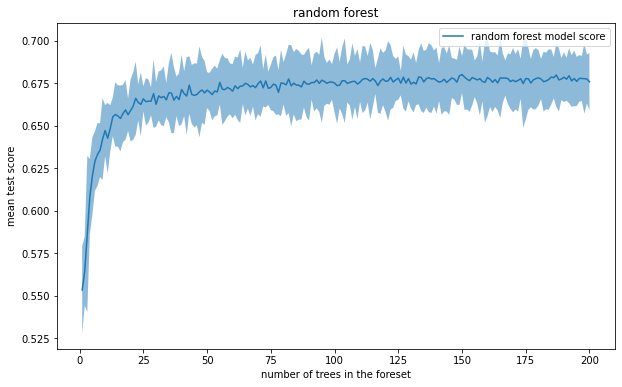

best estimator:  {'n_estimators': 150}
its score:  0.6802


In [62]:
means = rf_grid_searcher.cv_results_['mean_test_score']
stds = rf_grid_searcher.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
xs = rf_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, means,label='random forest model score')
plt.fill_between(xs, means-3*stds, means+3*stds, alpha=.5, linewidth=0)
plt.legend()
plt.title('random forest')
plt.xlabel('number of trees in the foreset')
plt.ylabel('mean test score')
plt.show()
print('best estimator: ',rf_grid_searcher.best_params_)
print('its score: ', rf_grid_searcher.best_score_)

**Task 2.3 [3 points] 2-D Grid Search**

Now it's time to improve the models with a 2-D grid search. For each classifier we will look for an optimal **pair** of hyperparameters. However, going through the whole grid may be computationally expensive, so here are some ways to speed it up:

1. Make sparse grids with fewer number of parameters
2. Choose random subsample from grid points and look for the optimum there
3. Reduce number of folds in cross-validation
4. Make a greedy grid search (use two grid-searchers sequentially)

You have 4 models, 4 methods how to make grid search faster, choose one method per model and try it out.
Report whether you got boost in quality.

Here are default 2-D grids:
- kNN:
    - n_neighbors from 1 to 50
    - metric: `euclidean`, `manhattan` or `chebyshev`
    
- linear
    - penalty `l1`, `l2`, `elasticnet`, `none`
    - C from 0.001 to 1000
    
- dtree:
    - max_depth from 1 to 50
    - criterion `gini` or `entropy`

- rf
    - n_estimators from 1 to 200
    - max_features from 1 to 30

**knn** - Reduce number of folds in cross-validation

- n_neighbors from 1 to 50
- metric: `euclidean`, `manhattan` or `chebyshev`

In [12]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1,51), "metric": ['euclidean', 'manhattan', 'chebyshev']
}
knn_grid_searcher = GridSearchCV(knn_clf,knn_grid, cv=3, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)
print('best estimator: ',knn_grid_searcher.best_params_)
print("its score: {:.4f}".format( knn_grid_searcher.best_score_))

best estimator:  {'metric': 'manhattan', 'n_neighbors': 45}
its score: 0.6197


**lr** - Choose random subsample from grid points and look for the optimum there

- penalty `l1`, `l2`, `elasticnet`, `none`
- C from 0.001 to 1000

In [16]:
import random
lr_clf = LogisticRegression(solver='saga', l1_ratio=0.5)
list=('l1', 'l2', 'elasticnet', 'none')
m=random.sample(range(0, 3), 2)
C1=random.sample(range(1, 950),1)
C2=random.sample(range(0, 50),1)
lr_grid = {
    "penalty": (list[m[0]], list[m[1]]),
    "C": np.arange(C1[0], C1[0]+C2[0])
}
print(lr_grid)
lr_grid_searcher = GridSearchCV(lr_clf, lr_grid , cv=5, return_train_score=True)
lr_grid_searcher.fit(X_train, y_train)
print('best estimator: ',lr_grid_searcher.best_params_)
print("its score: {:.4f}".format( lr_grid_searcher.best_score_))

{'penalty': ('elasticnet', 'l2'), 'C': array([755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767,
       768, 769, 770, 771, 772, 773])}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when p

best estimator:  {'C': 758, 'penalty': 'elasticnet'}
its score: 0.5792


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
print('best estimator: ',lr_grid_searcher.best_params_)
print("its score: {:.4f}".format( lr_grid_searcher.best_score_))

best estimator:  {'C': 758, 'penalty': 'elasticnet'}
its score: 0.5792


**dtree** - Make a greedy grid search (use two grid-searchers sequentially)
- max_depth from 1 to 50
- criterion `gini` or `entropy`

In [17]:
dt_clf = DecisionTreeClassifier()
dt_grid = {
    "max_depth":  np.arange(1,51)
}
#print(dt_grid)
dt_grid_searcher = GridSearchCV(dt_clf, dt_grid , cv=5, return_train_score=True)
dt_grid_searcher.fit(X_train, y_train)

depth=dt_grid_searcher.best_params_
dep=(depth["max_depth"] )
print(dep)
dt_grid = {
    "criterion":  ('gini','entropy'),
    "max_depth": [dep]
}
dt_clf = DecisionTreeClassifier()
dt_grid_searcher = GridSearchCV(dt_clf, dt_grid , cv=5, return_train_score=True)
dt_grid_searcher.fit(X_train, y_train)

print('best estimator: ',dt_grid_searcher.best_params_)
print('its score: ', dt_grid_searcher.best_score_)


8
best estimator:  {'criterion': 'gini', 'max_depth': 8}
its score:  0.6547499999999999


**rf** - Make sparse grids with fewer number of parameters
- n_estimators from 1 to 200
- max_features from 1 to 30

In [64]:
rf_clf = RandomForestClassifier()
n_estim = {
    "n_estimators":  np.arange(1,201,20),
    "max_features": np.linspace(1,30, num=5)
}
rf_grid_searcher = GridSearchCV(rf_clf, n_estim, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1.  ,  8.25, 15.5 , 22.75, 30.  ]),
                         'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181])},
             return_train_score=True)

In [66]:
print('best estimator: ',rf_grid_searcher.best_params_)
print('its score: ', rf_grid_searcher.best_score_)

best estimator:  {'max_features': 1.0, 'n_estimators': 161}
its score:  0.68505


In [ ]:

print('best estimator: ',rf_grid_searcher.best_params_)
print('its score: ', rf_grid_searcher.best_score_)

Улучшились: knn на 0.018 и rf на 0.005

**Task 2.4 [1 point] Categorical features**

Add categorical features and examine how the influence performance of each model. Preprocess the data before applying a model: we need to encode categorical features with one-hot encoding (`get_dummies` from `pandas` or `OneHotEncoder` from `sklearn`).

Don't forget to repeat the train-test-val splits.

In [34]:
objects_with_dummies = pd.get_dummies(objects)

X = objects_with_dummies
y = labels #y=y

assert X.shape == (35000, 69) and  y.shape == (35000,)

What was your best model before adding categorical features?

Use GridSearch + 5-fold CV on **train set** to define your new best model.

In [35]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size=15000, 
                                                    shuffle=True, stratify= None,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size=5000, 
                                                    shuffle=True, stratify= None,
                                                    random_state=RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

knn

In [31]:
knn_clf = KNeighborsClassifier()
knn_grid = {
"n_neighbors": np.arange(1,51)
}
knn_grid_searcher = GridSearchCV(knn_clf,knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [35]:
print('best estimator: ',knn_grid_searcher.best_params_)
print('its score: ', knn_grid_searcher.best_score_)

best estimator:  {'n_neighbors': 50}
its score:  0.55655


dt

In [36]:
dt_clf = DecisionTreeClassifier()
dt_grid = {
"max_depth": np.arange(1,51)
}
#print(dt_grid)
dt_grid_searcher = GridSearchCV(dt_clf, dt_grid , cv=5, return_train_score=True)
dt_grid_searcher.fit(X_train, y_train)

print('best estimator: ',dt_grid_searcher.best_params_)
print('its score: ', dt_grid_searcher.best_score_)

best estimator:  {'max_depth': 10}
its score:  0.6529


lr

In [61]:
lr_clf = LogisticRegression(solver='saga', l1_ratio=0.5)
lr_grid = {
"penalty": ('l1', 'l2', 'elasticnet', 'none')
}
lr_grid_searcher = GridSearchCV(lr_clf, lr_grid , cv=5, return_train_score=True)
lr_grid_searcher.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarn

GridSearchCV(cv=5, estimator=LogisticRegression(l1_ratio=0.5, solver='saga'),
             param_grid={'penalty': ('l1', 'l2', 'elasticnet', 'none')},
             return_train_score=True)

In [64]:
print('best estimator: ',lr_grid_searcher.best_params_)
print("its score: {:.4f}".format( lr_grid_searcher.best_score_))

best estimator:  {'penalty': 'l1'}
its score: 0.5654


rf

In [26]:
rf_clf = RandomForestClassifier()
n_estim = {
"n_estimators": np.arange(1,201)
}
rf_grid_searcher = GridSearchCV(rf_clf, n_estim, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)
print('best estimator: ',rf_grid_searcher.best_params_)
print('its score: ', rf_grid_searcher.best_score_)

best estimator:  {'n_estimators': 121}
its score:  0.6776


Performance of which model increased the most? Why?

**Your answer here**: ни одна модель не улучшилась, все немного ухудшились. Возможно, из-за большого количества фичей им стало сложнее считать и точность ухудшилась

**Task 2.5 [2 point] Blending**

Since you have already trained and tuned a lot of models, it might be useful to **blend** two best classifiers to get one even better.

Pick two best models, say, `clf_a` and `clf_b`, train them on the `train_set`.

Then use `Voting classifier` to build 
$$
clf_c(\alpha) = \alpha \cdot clf_a + (1 - \alpha) \cdot clf_b
$$
You will have to tune $\alpha$ using grid search on `test_set` and then make final quality assessment on `val_set`.

In [70]:
from sklearn.ensemble import VotingClassifier
clf_a=RandomForestClassifier(n_estimators=121)
clf_b=DecisionTreeClassifier(max_depth=10)

clf_a.fit(X_train, y_train)
clf_b.fit(X_train, y_train)

eclf = VotingClassifier(estimators=[('rf', clf_a), ('dt', clf_b)])
a=np.linspace(0,1, num=10)
#print(a)
b=1-a
koef=[]
for i in range(0, 10):
  koef.append([a[i],b[i]])
print(koef)
voting_grid={ 'weights':koef }
voting_grid_searcher = GridSearchCV(eclf, voting_grid, cv=5)
voting_grid_searcher.fit(X_test, y_test)


[[0.0, 1.0], [0.1111111111111111, 0.8888888888888888], [0.2222222222222222, 0.7777777777777778], [0.3333333333333333, 0.6666666666666667], [0.4444444444444444, 0.5555555555555556], [0.5555555555555556, 0.4444444444444444], [0.6666666666666666, 0.33333333333333337], [0.7777777777777777, 0.22222222222222232], [0.8888888888888888, 0.11111111111111116], [1.0, 0.0]]


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('rf',
                                                     RandomForestClassifier(n_estimators=121)),
                                                    ('dt',
                                                     DecisionTreeClassifier(max_depth=10))]),
             param_grid={'weights': [[0.0, 1.0],
                                     [0.1111111111111111, 0.8888888888888888],
                                     [0.2222222222222222, 0.7777777777777778],
                                     [0.3333333333333333, 0.6666666666666667],
                                     [0.4444444444444444, 0.5555555555555556],
                                     [0.5555555555555556, 0.4444444444444444],
                                     [0.6666666666666666, 0.33333333333333337],
                                     [0.7777777777777777, 0.22222222222222232],
                                     [0.8888888888888888, 0.111111111

In [75]:
print('best estimator: ',voting_grid_searcher.best_params_)
#voting_pred =  voting_grid_searcher.predict(X_val)
#train_score = mean_squared_error(X_val, Y_val)
print('val_set score: ', voting_grid_searcher.score(X_val, y_val))

best estimator:  {'weights': [0.6666666666666666, 0.33333333333333337]}
val_set score:  0.6666


What was the best pair of models to blend? Did blending help to increase quality of each classifier?

**Your answer here**: DT и RF, у них были самые лучшие результаты, 0.6529 и 0.6776 соответственно. Блэндинг дал скор 0.6666, что хуже, чем y RF (но лучше, чем у DT)